# Importing necessary libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Getting train data

In [184]:
path = "" # we need to put path of the folder of the data if it's not in the same folder
data_train = pd.read_csv(path + "train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [185]:
print("\"shape of traindata\" \n ",data_train.shape)
print("\"stats of features \" \n",data_train.describe())
print(" \"data type of features \"\n",data_train.info())

"shape of traindata" 
  (14999, 9)
"stats of features " 
              adview
count  1.499900e+04
mean   2.107791e+03
std    5.237711e+04
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    6.000000e+00
max    5.429665e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB
 "data type of features "
 None


# Visualization with matplotlib

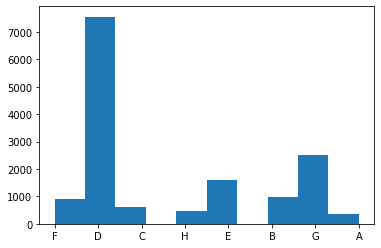

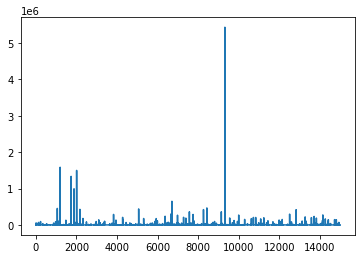

In [186]:
# Individual Plots
plt.hist(data_train["category"])
plt.show()#more data is occupied at D
plt.plot(data_train["adview"])
plt.show()

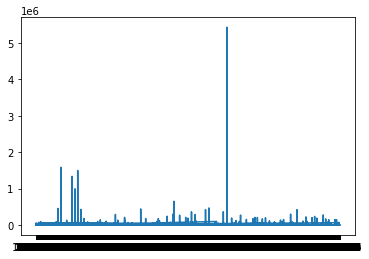

In [187]:
plt.plot(data_train['views'],data_train['adview'])

# Removing outliers

In [188]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [189]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [190]:
data_train.drop('vidid',axis=1,inplace=True)#as video id doesnt contribute anything to the adviews,we can remove

#visualization with Seaborn library


In [191]:
# Heatmap
import seaborn as sns
#f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

# removing unnecessary data....converting object data to int

In [192]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()


,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D


In [193]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,1,666,1,0,0,2016-06-29,PT31S,4


In [194]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [195]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [196]:
print(data_train.head())
# Convert Time_in_sec for duration
import datetime
import time

   adview    views  likes  dislikes  comment  published  duration  category
0      40  1031602   8523       363     1095       2168      2925         6
1       2     1707     56         2        6       2185      3040         4
2       1     2023     25         0        2       2094      1863         3
3       6   620860    777       161      153       2119      2546         8
4       1      666      1         0        0       2091      1963         4


In [197]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if (i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if (h==''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

In [198]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

In [199]:
data_train["duration"]=time1
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


In [200]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14636 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   adview     14636 non-null  int64
 1   views      14636 non-null  int64
 2   likes      14636 non-null  int64
 3   dislikes   14636 non-null  int64
 4   comment    14636 non-null  int64
 5   published  14636 non-null  int64
 6   duration   14636 non-null  int64
 7   category   14636 non-null  int64
dtypes: int64(8)
memory usage: 1.0 MB


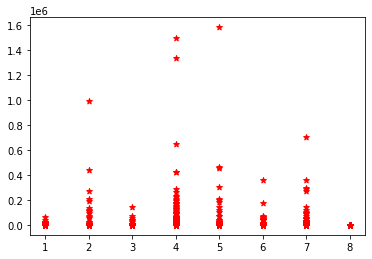

In [201]:
plt.scatter(data_train['category'],data_train['adview'],c='red',marker='*')

In [202]:
x=data_train.iloc[:,1:]
y=data_train.iloc[:,0]

# Splitting data

In [203]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [204]:

X_train.shape

(11708, 7)

In [205]:
X_train

,views,likes,dislikes,comment,published,duration,category
13440,86739,117,9,4,1217,180,4
9523,1419766,887,362,232,1547,5811,7
3012,26086,19,0,9,966,178,6
1888,305445,3662,45,555,1484,257,7
11378,737649,1702,96,53,1127,895,4
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,231,7
13748,1804,4,1,0,1049,232,4
5522,204817,86,35,11,1237,218,4
883,1361366,1384,757,185,2145,240,7


In [206]:
y

0        40
1         2
2         1
3         6
4         1
         ..
14994     2
14995     1
14996     4
14997     1
14998     1
Name: adview, Length: 14636, dtype: int64

# normalising data

In [207]:
# Normalise Data
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.fit_transform(X_test)

#im not normalising it because when i cross check with ip features i got 58 as the constant ADVIEW


In [208]:
#X_train.mean()

# evaluating diff models with diff errors throght the function

In [209]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression

In [210]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 13440 to 7445
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   views      11708 non-null  int64
 1   likes      11708 non-null  int64
 2   dislikes   11708 non-null  int64
 3   comment    11708 non-null  int64
 4   published  11708 non-null  int64
 5   duration   11708 non-null  int64
 6   category   11708 non-null  int64
dtypes: int64(7)
memory usage: 731.8 KB


In [211]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3555.8238945996677
Mean Squared Error: 831728534.4570614
Root Mean Squared Error: 28839.70413262004


# Support Vector Regressor


In [212]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3555.8238945996677
Mean Squared Error: 831728534.4570614
Root Mean Squared Error: 28839.70413262004


# Decision Tree Regressor

In [213]:

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2703.9849726775956
Mean Squared Error: 1492456913.9822404
Root Mean Squared Error: 38632.32990620991



# Random Forest Regressor

In [214]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 2914.824551741969
Mean Squared Error: 663152720.6388097
Root Mean Squared Error: 25751.751797476027


# Artificial Neural Network

In [215]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [216]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 26822807362.2670 - mean_squared_error: 26822807362.2670
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 757104382.4394 - mean_squared_error: 757104382.4394
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 711502852.8283 - mean_squared_error: 711502852.8283
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 900960459.1849 - mean_squared_error: 900960459.1849
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 485761192.5913 - mean_squared_error: 485761192.5913
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 812284308.8420 - mean_squared_error: 812284308.8420
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 544489001.5591 - mean_squared_error: 544489001.5591
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 385718972.7902 - mean_squared_er

In [217]:
m=decision_tree.predict([[1031602,8523,363,1095,2168,2925,6]])

In [218]:
m

array([40.])

#Saving Scikitlearn models

In [219]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

# Saving Keras Artificial Neural Network model

In [220]:
ann.save("ann_youtubeadview.h5")

# test model with test data

In [221]:
test_data=pd.read_csv('test.csv')

In [222]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


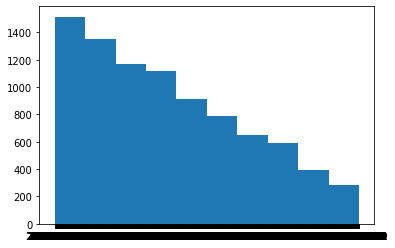

In [223]:
plt.hist(test_data["published"])
plt.show()


In [224]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [225]:
test_data.shape

(8764, 8)

In [226]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_data["category"]=test_data["category"].map(category)
test_data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [227]:
# Convert Time_in_sec for duration
import datetime
import time

In [228]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if (i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if (h==''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv(path + "test.csv")["duration"]
time = mp.apply(checki)

In [229]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

In [230]:
test_data["duration"]=time1
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,449,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,389,6
2,VID_13967,28534,31,11,1,2014-03-10,2274,4
3,VID_19442,1316715,2284,250,274,2010-06-05,595,7
4,VID_770,1893173,2519,225,116,2016-09-03,188,2


In [231]:
test_data['published']=LabelEncoder().fit_transform(test_data['published'])

In [232]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2055,449,2
1,VID_18629,1040132,8171,340,1047,1827,389,6
2,VID_13967,28534,31,11,1,1010,2274,4
3,VID_19442,1316715,2284,250,274,117,595,7
4,VID_770,1893173,2519,225,116,1894,188,2


In [233]:
test_data=test_data.drop(["vidid"],axis=1)
test_data.head()


,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2055,449,2
1,1040132,8171,340,1047,1827,389,6
2,28534,31,11,1,1010,2274,4
3,1316715,2284,250,274,117,595,7
4,1893173,2519,225,116,1894,188,2


In [234]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   views      8764 non-null   object
 1   likes      8764 non-null   object
 2   dislikes   8764 non-null   object
 3   comment    8764 non-null   object
 4   published  8764 non-null   int64 
 5   duration   8764 non-null   int64 
 6   category   8764 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 479.4+ KB


In [235]:
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']

In [236]:
# Convert values to integers for views, likes, comments, dislikes and adview
test_data["views"] = pd.to_numeric(test_data["views"])
test_data["comment"] = pd.to_numeric(test_data["comment"])
test_data["likes"] = pd.to_numeric(test_data["likes"])
test_data["dislikes"] = pd.to_numeric(test_data["dislikes"])

In [237]:
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2055,449,2
1,1040132,8171,340,1047,1827,389,6
2,28534,31,11,1,1010,2274,4
3,1316715,2284,250,274,117,595,7
4,1893173,2519,225,116,1894,188,2


In [238]:
predictions = decision_tree.predict(test_data)

In [239]:
print(predictions)

[11.  1.  2. ...  6.  3.  1.]


In [240]:
df = pd.DataFrame(predictions, columns = ['predictions'])

In [241]:
df.head()

,predictions
0,11.0
1,1.0
2,2.0
3,6.0
4,3.0


In [242]:
g=random_forest.predict([[620860,777,161,153,2119,2546,8]])

In [243]:
g

array([6.84702138])

In [244]:
df.to_csv('predictions.csv')

In [245]:
m=decision_tree.predict([[620860,777,161,153,2119,2546,8]])

In [246]:
m

array([2.])

In [247]:
f=decision_tree.predict([[1031602,8523,363,1095,2168,457,6]])

In [248]:
f

array([40.])

In [249]:
j=decision_tree.predict([[2023,25,0,2,2094,136,3]])

In [250]:
j

array([1.])